# Лабораторная работа №2
**Выполнена студентом группы А-05-20 Ходосевичем Леонидом**  
**Вариант 25**

# Задача 2.1
Методом простой итерации найти  вещественные корни алгебраического уравнения $F(x) = 0$  с точностью $\varepsilon = 10^{-8} $  
  
$F(x) = -3.3 * x^{3} - 11.6 * x^{2} + 8.75 * x + 15.4 $  
  
Расчестная формула: $ x_{n+1} = x_n - \alpha*F(x_n) $  
Условие остановки : $ |x_{n+1} - x_n| < \varepsilon * \frac{1-q}{q} $  
Коэфициент q и $\alpha$ и то, что нужно для того, чтобы их найти:  
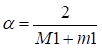  
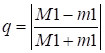  
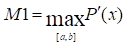  
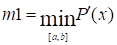  

In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(precision = 13)

**Строим функцию и производную**

In [2]:
def function(x):
    return (-3.3*x**3 - 11.6*x**2 + 8.75*x + 15.4)

def function_derivative(x):
    return (-9.9*x**2 -23.2*x + 8.75)

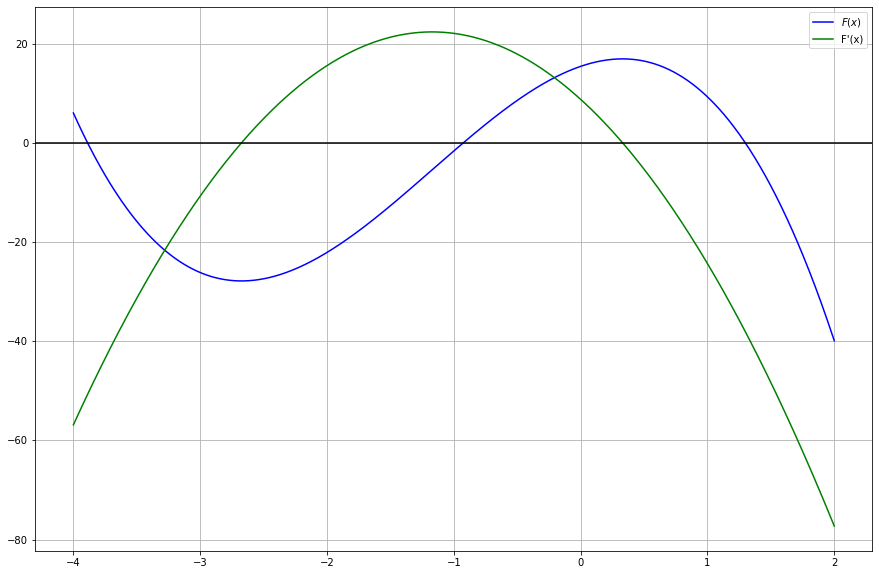

In [3]:
x_range = np.linspace(-4,2, 1000)

fig, ax = plt.subplots(1, 1, figsize = (15, 10))
ax.plot(x_range, function(x_range), c = 'b', label = '$ F(x) $')
ax.plot(x_range, function_derivative(x_range), c = 'g', label = "F'(x)" )
ax.axhline(0, c = 'black')
ax.legend()
ax.grid()

**Локализуем каждый корень и строим графики функции и производной в каждом отрезке локализации**

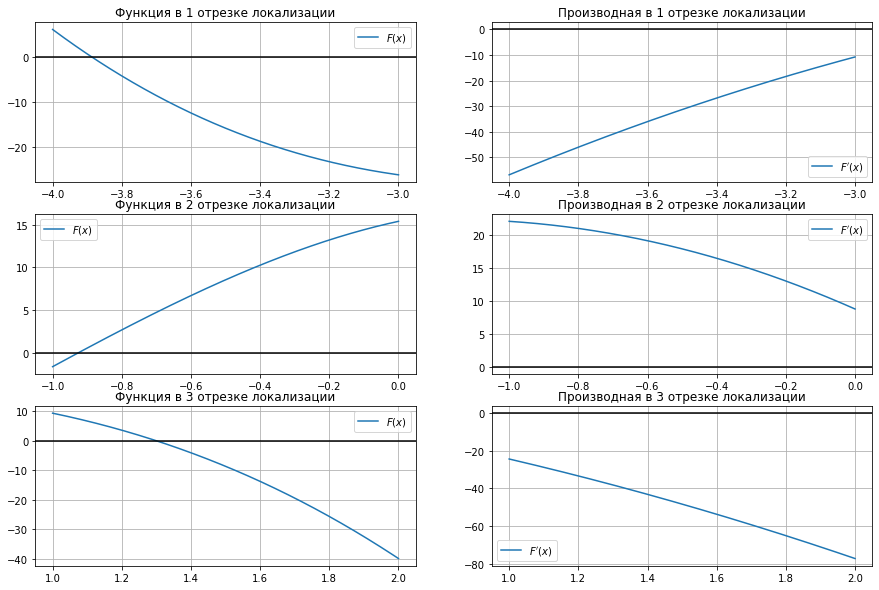

In [4]:
a1 = -4; b1 = -3
a2 = -1; b2 = 0
a3 = 1; b3 = 2
A = [a1, a2, a3]
B = [b1, b2, b3]

fig, ax = plt.subplots(len(A), 2, figsize = (15, 10))
for i in range(len(A)):
    x_range = np.linspace(A[i], B[i], 1000)
    ax[i][0].plot(x_range, function(x_range), label = '$F(x)$')
    ax[i][1].plot(x_range, function_derivative(x_range), label = "$F'(x)$")
    ax[i][0].set_title('Функция в {0} отрезке локализации'.format(i+1))
    ax[i][1].set_title('Производная в {0} отрезке локализации'.format(i+1))
    for j in range(2):
        ax[i][j].legend()
        ax[i][j].grid()
        ax[i][j].axhline(0, c = 'black')   

In [5]:
from iteration_methods import iteration_method

In [6]:
eps = 10**(-8)
task1_result = iteration_method(function,function_derivative,A,B,eps)
task1_result.fit()
task1_result.display_result()

,a,b,M1,m1,alpha,q,Значение корня,Количество итераций
1 корень,-4,-3,-10.75,-56.85,-0.029586,0.681953,-3.888406,27
2 корень,-1,0,22.05,8.75,0.064935,0.431818,-0.924669,21
3 корень,1,2,-24.35,-77.25,-0.019685,0.520669,1.297923,13


# Задача 2.2
Дано уравнение   $F(x) = sin(x) - \sqrt{x}cos(4x) - 1 = 0$  
Найти все  корни уравнения с заданной точностью  $\varepsilon = 10^{-12} $     
на указанном отрезке [a,b] = [5,10]    
Для решения задачи использовать метод Ньютона и Упрощенный метод Ньютона
Сравнить количество итераций, потребовавшихся для достижения заданной точности каждым методом.  
Расчетная формула метода Ньютона:  
$x_{n+1} = x_{n} - \frac{F(x_{n})}{F'(x_{n})}$  
Расчетная формула упрощенного метода Ньютона:  
$x_{n+1} = x_{n} - \frac{F(x_{n})}{F'(x_{0})}$

Задаем функцию и ее производную

In [7]:
def function_2(x):
    return np.sin(x) - np.sqrt(x) * np.cos(4*x) - 1
    
def function_derivative_2(x):
    return np.cos(x) - np.cos(4*x) / (2 * np.sqrt(x)) + 4 * np.sqrt(x) * np.sin(4 *x) 


Строим график функции на заданном отрезке

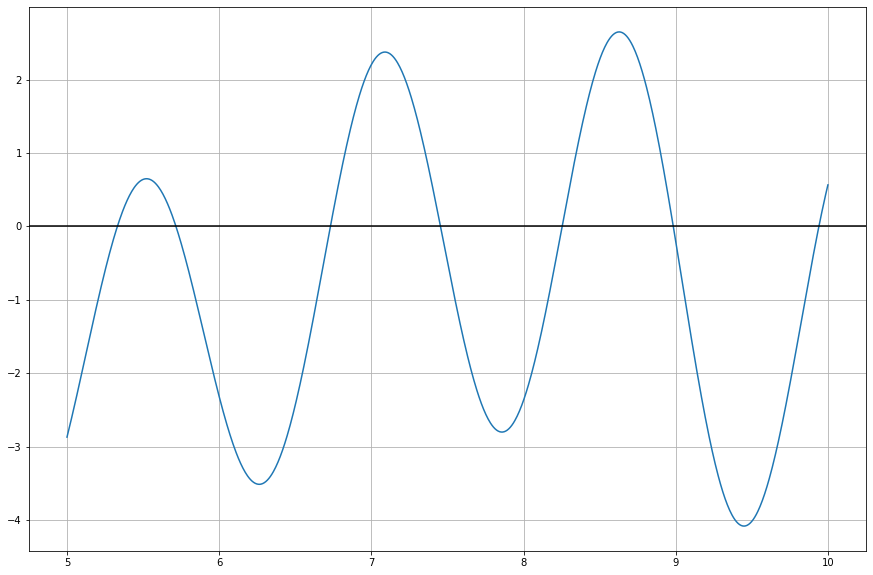

In [8]:
x_range = np.linspace(5, 10, 1000)

fig, ax = plt.subplots(1,1, figsize = (15,10))
ax.plot(x_range,function_2(x_range))
ax.axhline(0, c = 'black')
ax.grid()

Отрезки локализации:

In [9]:
A = [5.2, 5.6, 6.6, 7.4, 8.2, 8.8, 9.8]
B = [5.4, 5.8, 6.8, 7.6, 8.4, 9, 10]

Функция на отрезках локализации:

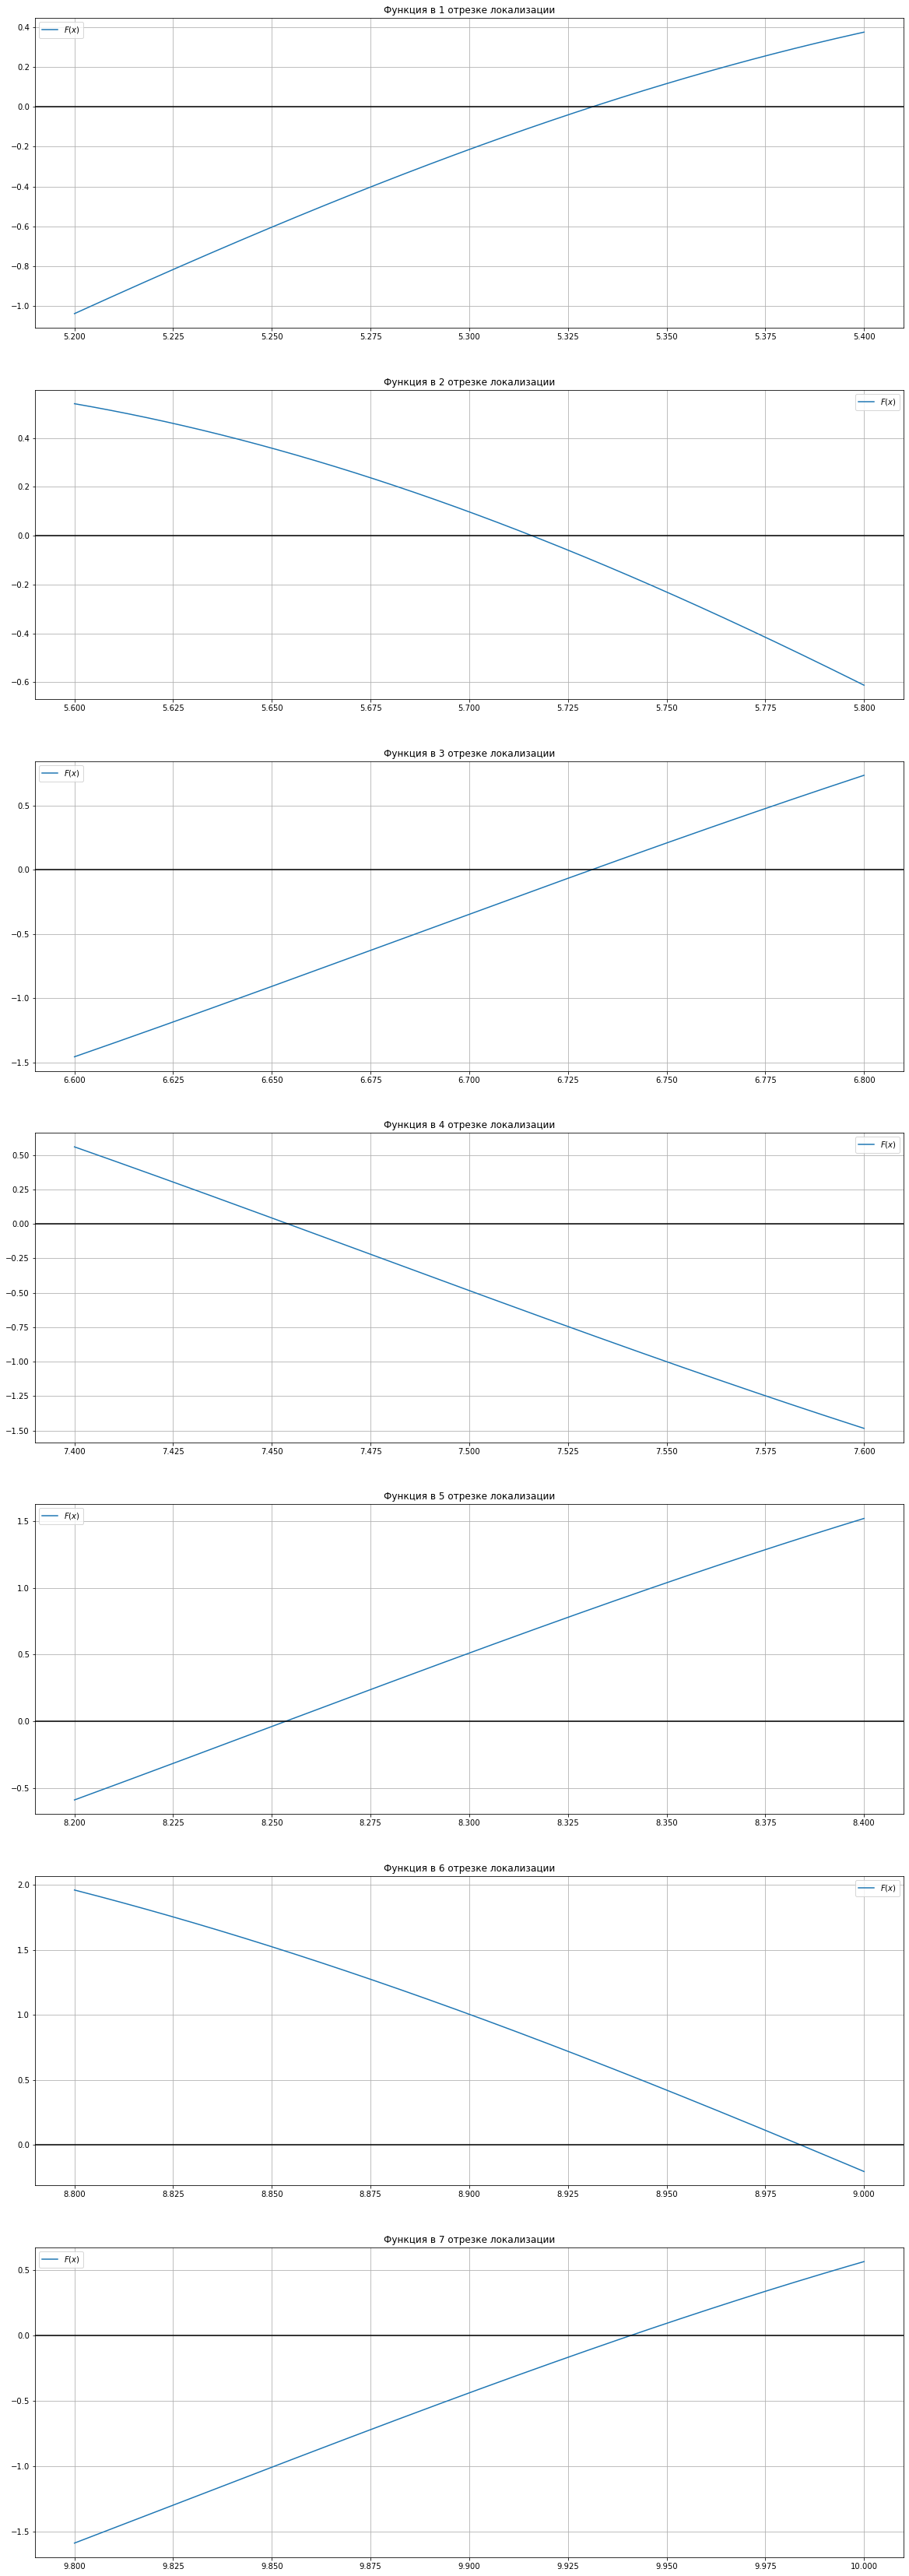

In [10]:
fig, ax = plt.subplots(7, 1, figsize = (20, 60))

for i in range(7):
    x_range = np.linspace(A[i], B[i], 1000)
    ax[i].plot(x_range, function_2(x_range), label = '$F(x)$')
    ax[i].set_title('Функция в {0} отрезке локализации'.format(i+1))
    ax[i].legend()
    ax[i].grid()
    ax[i].axhline(0, c = 'black')   

Составляем расчетную формулу и формируем результат

In [11]:
from newton_methods import newton_method

In [12]:
eps = 10**(-12)

standart = newton_method(function_2,function_derivative_2,A,B)
standart.fit('standard',eps)
standart.display_result()

,a,b,Значение корня,Количество итераций
1 корень,5.2,5.4,5.331130,5
2 корень,5.6,5.8,5.715872,4
3 корень,6.6,6.8,6.730969,4
4 корень,7.4,7.6,7.454056,4
5 корень,8.2,8.4,8.253536,4
6 корень,8.8,9.0,8.983963,5
7 корень,9.8,10.0,9.940842,5


In [13]:
simple = newton_method(function_2,function_derivative_2,A,B)
simple.fit('simple',eps)
simple.display_result()

,a,b,Значение корня,Количество итераций
1 корень,5.2,5.4,5.331130,12
2 корень,5.6,5.8,5.715872,10
3 корень,6.6,6.8,6.730969,7
4 корень,7.4,7.6,7.454056,5
5 корень,8.2,8.4,8.253536,8
6 корень,8.8,9.0,8.983963,14
7 корень,9.8,10.0,9.940842,10


Как видим, методы посчитали результат одинакого, количество итераций у упрощенного метода больше.  
Связано это со скоростью метода, он линейный, а у обычного метода скорость квадратичная.  
В следующем подразделе покажем это, вычислив невязку для первого корня

**Подзадание**  
Модифицировать  методы так, чтобы каждый метод делал заданное количество итераций и на каждом шаге сохранял значение модуля невязки  .   
Методы должны возвращать массив, хранящий значения  .   
Для каждого корня вызвать модифицированные методы так, чтобы они проделали 10 итераций.  
Построить  графики зависимости   от n = {0..10} в логарифмической шкале. 
Каждому корню должно соответствовать одно изображение, на котором нарисованы зависимости для двух методов. 
Полученный результат объясните.

In [14]:
standart_with_resudue = newton_method(function_2,function_derivative_2,A,B)
standart_with_resudue.fit('standard_with_residue',eps,stop=11)
simple_with_resudue = newton_method(function_2,function_derivative_2,A,B)
simple_with_resudue.fit('simple_with_residue',eps,stop=11)

Строим графики с логарифмической шкалой y

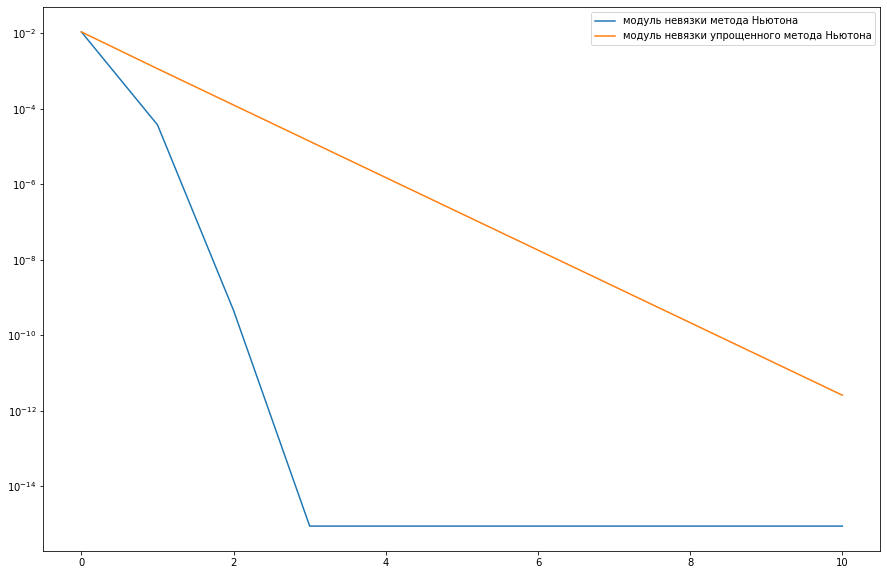

In [15]:
fig, ax = plt.subplots(1,1, figsize = (15,10))
ax.plot([i for i in range(11)], standart_with_resudue.result, label = 'модуль невязки метода Ньютона')
ax.plot([i for i in range(11)], simple_with_resudue.result, label = 'модуль невязки упрощенного метода Ньютона')
ax.legend()
ax = plt.yscale('log')

Как можно увидеть из графика, Метод Ньютона обладает квадратичной сходимостью, а упрощенный метод Ньютона - линейной. 

# Задача 2.3
**Найти корни уравнения и определить их кратность.**

Функция:

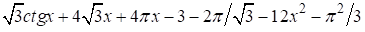

Задаем Функцию и ее производную:

In [16]:
def function_3(x):
    return np.sqrt(3)/np.tan(x) + 4*np.sqrt(3)*x + 4*np.pi*x - 3 - 2*np.pi / np.sqrt(3) - 12*x**2 - np.pi**2 / 3
def function_derivative_3(x):
    return np.sqrt(3)*(-1 / np.sin(x)**2) + 4*np.sqrt(3) + 4*np.pi - 24*x

Смотрим где примерно находятся корни уравнения(в 0 функция не определена

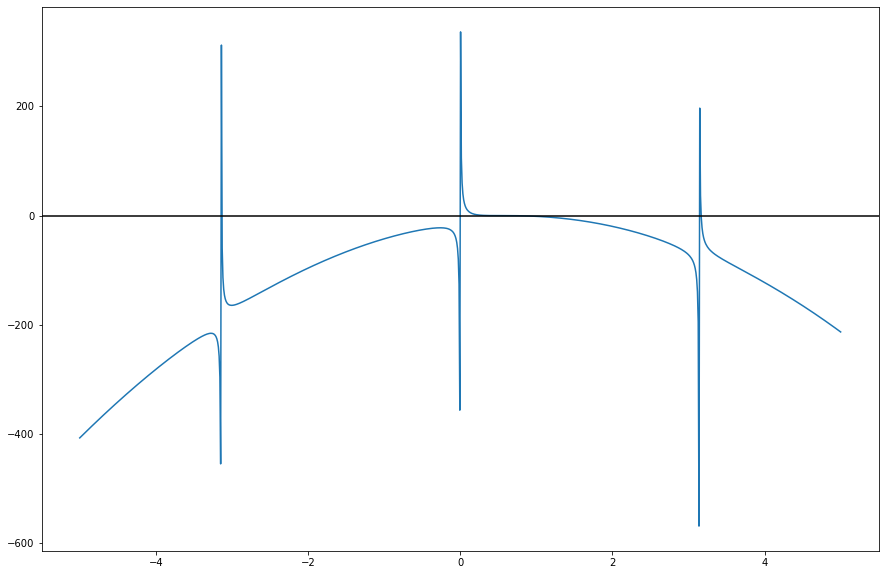

In [17]:
x_range = np.linspace(-5, 5, 1000)

fig, ax = plt.subplots(1,1, figsize = (15,10))
ax.plot(x_range,function_3(x_range))
ax.axhline(0, c = 'black')

Локализовали корень

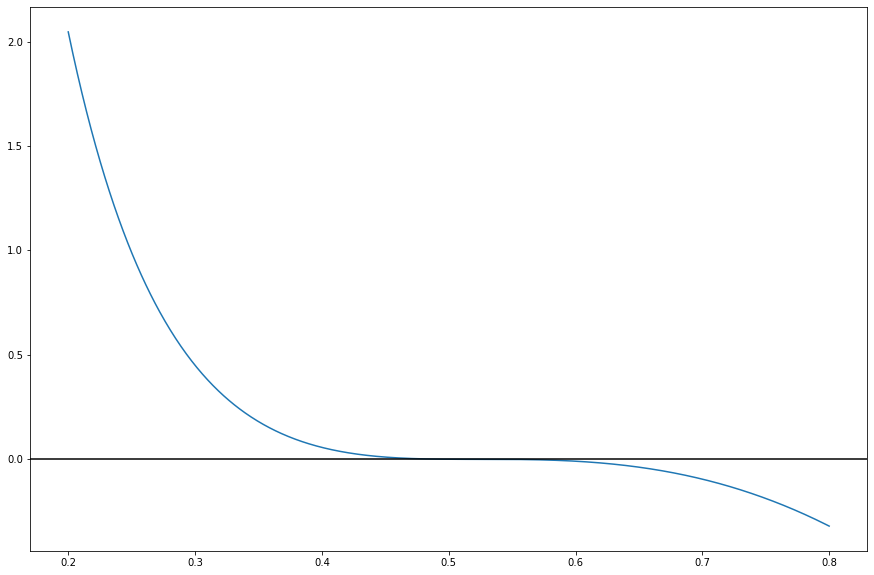

In [18]:
A = [0.2]
B = [0.8]
x_range = np.linspace(A, B, 1000)

fig, ax = plt.subplots(1,1, figsize = (15,10))
ax.plot(x_range,function_3(x_range))
ax.axhline(0, c = 'black')

Будем пользоваться формулой Ньютона для кратных корней.  
$x_{n+1} = x_{n} - m\frac{F(x_{n})}{F'(x_{n})}$,  
где m - это кратность корня.  
Воспользуемся фактом, что если m равна кратности корня, то метод сходится быстро, т.е. мы получим ответ за малое количество итераций

In [23]:
eps = 10**(-12)

multiple_newton = newton_method(function_3,function_derivative_3,A,B)
multiple_newton.fit('multiple',eps,multiple_edge=5)
print(multiple_newton.result)
print(multiple_newton.result_t)

[0.5235955633709525, 0.5235987574730608, 0.5235986906705336, 0.5235982113686215]
[53, 24, 3, 21]


Видим, что при кратности корня m = 3 метод требует всего лишь 3 итерации. Так как очень быстрая скорость, то кратность корня равна m = 3, а его значение $\bar{x} = 0.5235986906705336$